In [156]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code"))
import hdf5storage
import mat73
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

import CURBD.curbd as curbd
import PyalData.pyaldata as pyaldata

In [157]:
data_dir_WTM350 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M350/WT-M350-pyaldata2" 
data_dir_WTM355 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M355/WT-M355-pyaldata2" 
data_dir_ASM351 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M351/AS-M351-pyaldata2" 
data_dir_ASM354 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M354/AS-M354-pyaldata2" 
data_dir_PSM365 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M365/PS-M365-pyaldata2" 
data_dir_PSM366 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M366/PS-M366-pyaldata2" 

In [158]:
files = os.listdir(data_dir_WTM355)
fpath = os.path.join(data_dir_WTM355, files[3])
df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
df["trial_id"] = range(len(df))
df = pyaldata.combine_time_bins(df, 5)
spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]
for col in spike_fields:
    df = pyaldata.remove_low_firing_neurons(df, col,  1)
for col in spike_fields:
    df = pyaldata.transform_signal(df, col,  'sqrt')
df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
df = pyaldata.add_firing_rates(df, 'smooth')
df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_14660\2914491666.py:14: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3

In [159]:
np.shape(df.all_rates[2])

(101, 284)

In [160]:
concat_all_rates = pyaldata.concat_trials(df[0:5], 'all_rates')
        


In [161]:
list_reset_points = []
for i in range(len(df[0:5])):
    list_reset_points.append(i*101)

list_reset_points

[0, 101, 202, 303, 404]

(284, 1)
trial=0 pVar=0.569374 chi2=2.445241


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


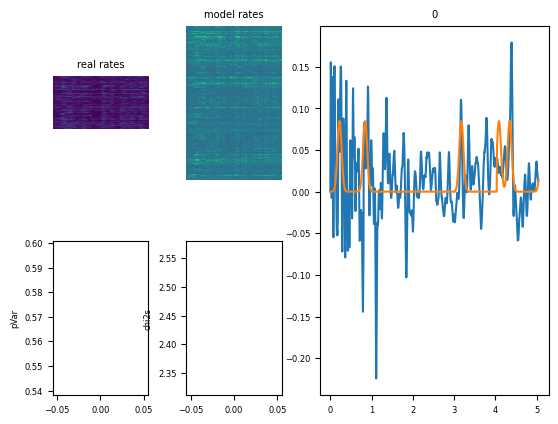

(284, 1)
trial=1 pVar=0.666416 chi2=2.008265
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=2 pVar=0.746215 chi2=1.520501


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=3 pVar=0.810597 chi2=1.120191
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=4 pVar=0.838446 chi2=0.950002
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=5 pVar=0.871317 chi2=0.751357
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=6 pVar=0.894076 chi2=0.604566
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=7 pVar=0.910002 chi2=0.510903
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=8 pVar=0.919062 chi2=0.460107
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=9 pVar=0.928280 chi2=0.400651
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=10 pVar=0.935269 chi2=0.354736
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=11 pVar=0.940088 chi2=0.324131


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=12 pVar=0.943464 chi2=0.300491
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=13 pVar=0.945694 chi2=0.284604
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=14 pVar=0.947847 chi2=0.271017
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=15 pVar=0.950068 chi2=0.257308
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=16 pVar=0.952188 chi2=0.243884
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=17 pVar=0.954150 chi2=0.231016
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=18 pVar=0.955809 chi2=0.219577
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=19 pVar=0.957155 chi2=0.210018


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=20 pVar=0.958337 chi2=0.201844
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=21 pVar=0.959464 chi2=0.194516
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=22 pVar=0.960522 chi2=0.187929
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=23 pVar=0.961453 chi2=0.182158
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=24 pVar=0.962234 chi2=0.177206
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=25 pVar=0.962886 chi2=0.172910
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=26 pVar=0.963446 chi2=0.169069
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=27 pVar=0.963940 chi2=0.165554
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=28 pVar=0.964379 chi2=0.162326


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=29 pVar=0.964764 chi2=0.159400
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=30 pVar=0.965100 chi2=0.156773
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=31 pVar=0.965403 chi2=0.154396
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=32 pVar=0.965692 chi2=0.152211
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=33 pVar=0.965976 chi2=0.150184
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=34 pVar=0.966259 chi2=0.148313
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=35 pVar=0.966539 chi2=0.146597
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=36 pVar=0.966818 chi2=0.145007
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=37 pVar=0.967097 chi2=0.143491


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=38 pVar=0.967375 chi2=0.142004


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=39 pVar=0.967645 chi2=0.140530
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=40 pVar=0.967897 chi2=0.139072
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=41 pVar=0.968129 chi2=0.137623
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=42 pVar=0.968346 chi2=0.136155
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=43 pVar=0.968558 chi2=0.134634
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=44 pVar=0.968774 chi2=0.133044
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=45 pVar=0.968999 chi2=0.131396


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=46 pVar=0.969233 chi2=0.129719
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=47 pVar=0.969475 chi2=0.128043
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=48 pVar=0.969724 chi2=0.126389
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=49 pVar=0.969979 chi2=0.124757
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=50 pVar=0.970245 chi2=0.123132
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=51 pVar=0.970523 chi2=0.121491
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=52 pVar=0.970815 chi2=0.119820
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=53 pVar=0.971116 chi2=0.118123
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=54 pVar=0.971420 chi2=0.116423


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=55 pVar=0.971720 chi2=0.114749
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=56 pVar=0.972008 chi2=0.113130
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=57 pVar=0.972279 chi2=0.111583
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=58 pVar=0.972532 chi2=0.110113
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=59 pVar=0.972765 chi2=0.108721
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=60 pVar=0.972980 chi2=0.107401
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=61 pVar=0.973179 chi2=0.106150
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=62 pVar=0.973363 chi2=0.104967
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=63 pVar=0.973534 chi2=0.103850


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=64 pVar=0.973694 chi2=0.102800
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=65 pVar=0.973843 chi2=0.101816
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=66 pVar=0.973983 chi2=0.100895
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=67 pVar=0.974115 chi2=0.100034
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=68 pVar=0.974239 chi2=0.099230
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=69 pVar=0.974356 chi2=0.098479
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=70 pVar=0.974467 chi2=0.097775
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=71 pVar=0.974573 chi2=0.097113


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=72 pVar=0.974673 chi2=0.096489
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=73 pVar=0.974769 chi2=0.095897
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=74 pVar=0.974862 chi2=0.095331
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=75 pVar=0.974951 chi2=0.094788
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=76 pVar=0.975036 chi2=0.094262
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=77 pVar=0.975118 chi2=0.093752
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=78 pVar=0.975197 chi2=0.093255
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=79 pVar=0.975271 chi2=0.092770
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=80 pVar=0.975342 chi2=0.092298


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=81 pVar=0.975408 chi2=0.091837
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=82 pVar=0.975469 chi2=0.091388
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=83 pVar=0.975526 chi2=0.090953
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=84 pVar=0.975578 chi2=0.090530
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=85 pVar=0.975626 chi2=0.090119
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=86 pVar=0.975671 chi2=0.089718
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=87 pVar=0.975713 chi2=0.089326
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=88 pVar=0.975752 chi2=0.088941
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=89 pVar=0.975790 chi2=0.088560


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=90 pVar=0.975828 chi2=0.088181
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=91 pVar=0.975866 chi2=0.087801
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=92 pVar=0.975906 chi2=0.087417
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=93 pVar=0.975946 chi2=0.087028
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=94 pVar=0.975989 chi2=0.086631
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=95 pVar=0.976035 chi2=0.086226
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=96 pVar=0.976083 chi2=0.085812
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=97 pVar=0.976134 chi2=0.085389


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(284, 1)
trial=98 pVar=0.976188 chi2=0.084956
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=99 pVar=0.976245 chi2=0.084516
(284, 1)


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=100 pVar=0.976504 chi2=0.083136


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:205: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [162]:
activity = np.transpose(concat_all_rates)  # transpose to get NxT (neurons x timesteps); input to the RNN is an array NxT of smoothed firing rates

Na = df.m1_rates[0].shape[1]
Nb = df.dcn_rates[0].shape[1]
Nc = df.str_rates[0].shape[1]

regions = []
regions.append(['m1', np.arange(0, Na)])  # region m1 and the array containing indexes of m1 units in activity; order matters so that the indexes matches the order m1, str, dcn, thal in activity
regions.append(['dcn', np.arange(Na, Na + Nb)])  # region str and the array containing indexes of str units in activity
regions.append(['str', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)

model = curbd.trainMultiRegionRNN(activity,
                                  dtData=df.bin_size[0],
                                  dtFactor=5,  # interpolation factor of RNN
                                  regions=regions,
                                  nRunTrain=100,
                                  verbose=True,
                                  plotStatus=True,
                                  nRunFree=1,
                                  resetPoints=list_reset_points)

In [163]:
model

{'regions': array([['m1',
         array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
                68, 69])                                                           ],
        ['dcn',
         array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
                 83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
                 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
                109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
                122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
                135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
                148, 149, 150, 151, 152, 153, 154,

In [164]:
a = [[1,2,3],[3,3,2]]
np.shape(a)

(2, 3)

In [165]:
model

{'regions': array([['m1',
         array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
                68, 69])                                                           ],
        ['dcn',
         array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
                 83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
                 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
                109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
                122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
                135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
                148, 149, 150, 151, 152, 153, 154,

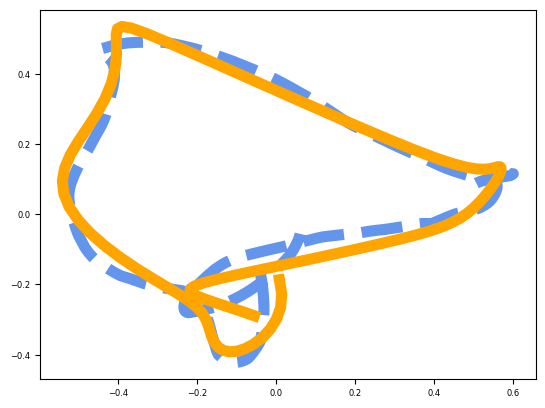

In [166]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],303:404]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],1515:2020]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

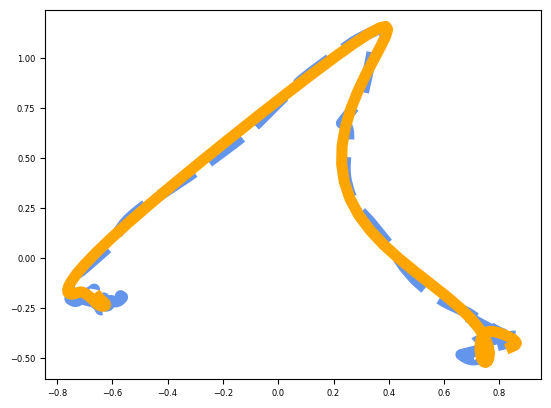

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

m1_activity = pca.fit_transform(np.transpose(model["Adata"][model["regions"][0,1],0:101]))
m1_activity = np.transpose(m1_activity)

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][0,1],0:505]))
m1_model = np.transpose(m1_model)
plt.plot(m1_model[0], m1_model[1], "cornflowerblue", linestyle="--", linewidth=8)
plt.plot(m1_activity[0], m1_activity[1], "orange", linewidth=8)
#plt.legend(["Model RNN","Experimental Data"], fontsize=20)

In [168]:
[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [170]:
df_unbinned = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
df_unbinned = pyaldata.select_trials(df_unbinned, "success == 1")  # only consider successful trials
df_unbinned["trial_id"] = range(len(df_unbinned))
df_unbinned = pyaldata.restrict_to_interval(df_unbinned, "idx_mo", end_point_name=None, rel_start=-250, rel_end=250)  # consider half a second before and after movement onset
concat_all_vel = pyaldata.concat_trials(df_unbinned[0:5], 'vel')

C:\Users\MARA\AppData\Local\Temp\ipykernel_14660\1637107758.py:4: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3]
  df_unbinned = pyaldata.restrict_to_interval(df_unbinned, "idx_mo", end_point_name=None, rel_start=-250, rel_end=250)  # consider half a second before and after movement onset


In [171]:
np.shape(concat_all_vel)

(2505,)

In [172]:
np.shape(curbd_arr[0,0][:,0:2505])

(70, 2505)

In [173]:
np.shape(df.vel)

(31,)

86.26329


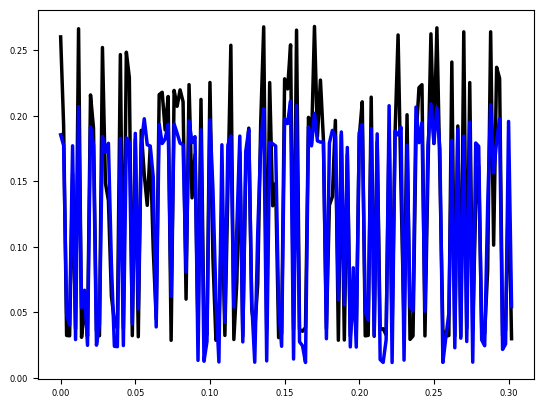

In [174]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

m1_model = pca.fit_transform(np.transpose(model["RNN"][model["regions"][2,1],0:505]))
X_train, X_test, y_train, y_test = train_test_split((m1_model), np.transpose(concat_all_vel[0:505]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:152],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:152],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




40.68465


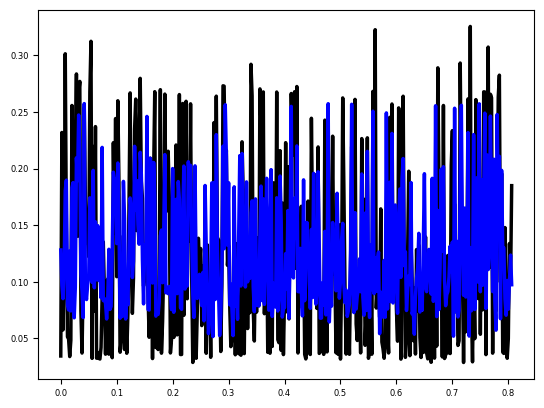

In [184]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

pca = PCA(n_components = 2)

current = pca.fit_transform(np.transpose(curbd_arr[2,1][:,0:2020]))
X_train, X_test, y_train, y_test = train_test_split(current, np.transpose(concat_all_vel[0:2020]), test_size=0.20, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:404],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:404],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [ ]:
curbd_labels[0,1]

'dcn to m1'

In [ ]:
np.shape(current)

(2521, 2)

In [ ]:
np.shape(curbd_arr[0,0])

(38, 2521)

In [ ]:
model["regions"][0,0]

'm1'

59.02894


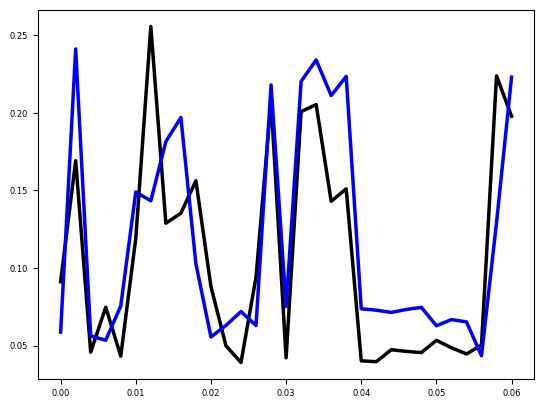

In [ ]:
from sklearn.model_selection import train_test_split
from permetrics.regression import RegressionMetric

X_train, X_test, y_train, y_test = train_test_split(np.transpose(m1_activity), np.transpose(concat_all_vel[0:505:5]), test_size=0.30, random_state=1) # split the data

# M1 to M1 current seems pretty good as well!

# TO DO: split in train-validate?-test to see the true performance of the thal to m1 current as m1 activity linear decoder

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

y_predictions = regressor.predict(X_test)
plt.plot(model['tRNN'][0:31],np.transpose(y_test), color='k', linewidth = 2.5)  # activity of M1
plt.plot(model['tRNN'][0:31],np.transpose(y_predictions.flatten()), color='b', linewidth = 2.5)  # activity of M1 as predicted from the linear decoder of dSTR-to-M1 current

evaluator = RegressionMetric(y_test, y_predictions, decimal=5)
print(evaluator.variance_accounted_for())




In [ ]:
np.shape(m1_model)
np.shape(concat_all_vel[0:505])

(505,)

In [ ]:
np.shape(concat_all_vel[0:505:5])

(101,)

In [ ]:
concat_all_vel[0:505]

array([0.04893837, 0.04912373, 0.04929858, 0.04945775, 0.04969248,
       0.04983443, 0.04996057, 0.05007321, 0.05013943, 0.05021452,
       0.05026743, 0.05029245, 0.05028451, 0.05024646, 0.05024552,
       0.05016891, 0.05016628, 0.05004716, 0.04999137, 0.0498475 ,
       0.04965478, 0.04947625, 0.04928028, 0.04906649, 0.04884113,
       0.04861055, 0.04839105, 0.04814108, 0.04798205, 0.0477803 ,
       0.04754127, 0.04731491, 0.04695983, 0.0466934 , 0.04646022,
       0.04624578, 0.04604461, 0.04584135, 0.04563642, 0.04546318,
       0.04541317, 0.04532951, 0.04527505, 0.04511327, 0.04495218,
       0.04484896, 0.04480278, 0.04473088, 0.04466301, 0.04462417,
       0.04458443, 0.04455331, 0.04461636, 0.04461812, 0.04464456,
       0.04462927, 0.04455981, 0.04461777, 0.04465356, 0.04467129,
       0.04474466, 0.04483877, 0.04486308, 0.04493517, 0.04504738,
       0.04513392, 0.04518118, 0.04525386, 0.04528612, 0.04536282,
       0.04540656, 0.04550368, 0.04557032, 0.04563126, 0.04571

In [ ]:
np.shape(X_train)

(353, 2)

In [ ]:
a = np.asarray(a)

In [ ]:
a[:,1]

array([2, 3])

In [ ]:
a[:,1,np.newaxis]

array([[2],
       [3]])

In [ ]:
np.shape(activity)

(82, 1919)

In [ ]:
np.shape(concat_all_rates)

(1919, 82)

In [ ]:
len(df)

19